# 1.0 Loading libraries and settings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
pd.set_option('display.max_columns', None)

# 2.0 Data Loading and Analysis

In [5]:
# Loading Data 
df = pd.read_csv('./Leads.csv')
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

######  From the info()  there are 7 numerical columns and remaining 30 are categorical

In [7]:
# Statstical Description of numerical variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# checking the null values of each column
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Quick check on Previous Order Conversion rate
round(len(df[df.Converted==1])/len(df)*100,2)

38.54

# 3.0 Exploratory Data Analysis

### 3.1 Data Cleaning

In [10]:
# Check for duplictaes
df.duplicated().unique()

array([False])

##### From the above check it is evident that there are no duplicate records found

### Lets check for 'Select' values, since 'Select' signifies that the person who filled the form did not selected any value. We will replace 'Select' value with NaN

In [11]:
# Creating a for loop and the required columns are appended into a new list

cols = list(df.columns)
val = ['Select']
new_list=[]

for i in range(len(cols)):
    if len(df[cols[i]].isin(val).unique()) > 1:
        new_list.append(cols[i])
  
new_list # column names having label 'Select'

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [14]:
# Replacing Select with None and None with mode
for col in new_list:
    df[col] = df[col].replace({"Select": None})

In [15]:
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### From above percentage of columns shows that some columns are having more than 40% of missing values, so it is better to remove these columns because imputing more than approx. 40%  is not a fair task for the given problem.

In [16]:
cols = df.columns
total_count = len(df.index)
for i in cols:
    if((100 * (df[i].isnull().sum() / total_count)) >= 40):
        df.drop(i, 1, inplace = True)

In [17]:
print("Before : ", len(cols), "\nAfter  : ",  len(df.columns))

Before :  37 
After  :  30


In [18]:
# Checking null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### 3.2 Categorical Attributes Analysis:

In [19]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
South Africa               4
Kuwait                     4
Nigeria                    4
Sweden                     3
Asia/Pacific Region        2
China                      2
Bangladesh                 2
Netherlands                2
Belgium                    2
Uganda                     2
Philippines                2
Italy                      2
Ghana                      2
Indonesia                  1
Kenya                      1
Vietnam                    1
Denmark                    1
Tanzania                   1
Switzerland   

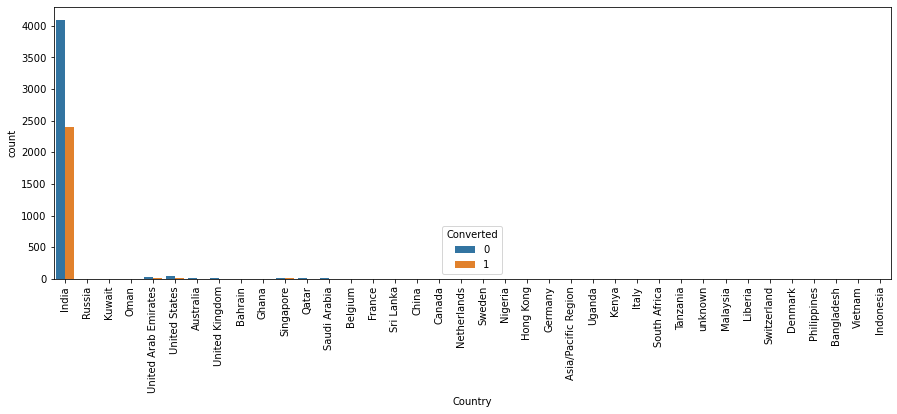

In [20]:
# Plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1 = sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India
df['Country'] = df['Country'].replace(np.nan,'India')

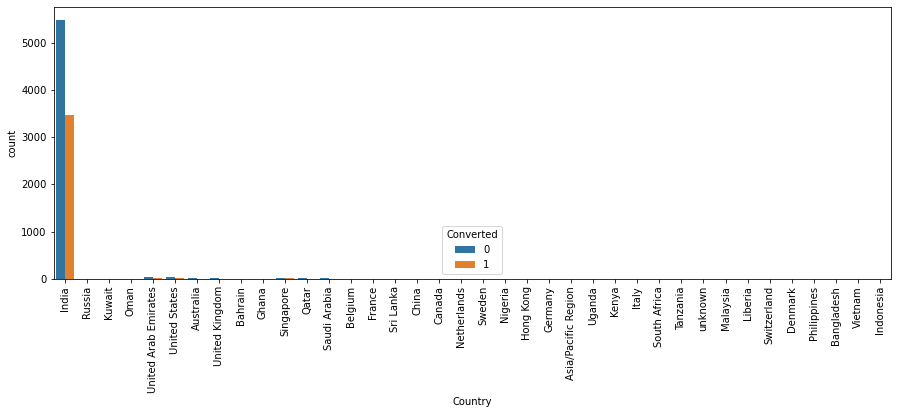

In [22]:
# Plotting spread of Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1 = sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [23]:
# Creating a list of columns to be droppped
cols_to_drop = []
cols_to_drop = ['Country']
cols_to_drop

['Country']

In [24]:
# Checking value counts of "City" column
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [25]:
df['City'] = df['City'].replace(np.nan,'Mumbai')

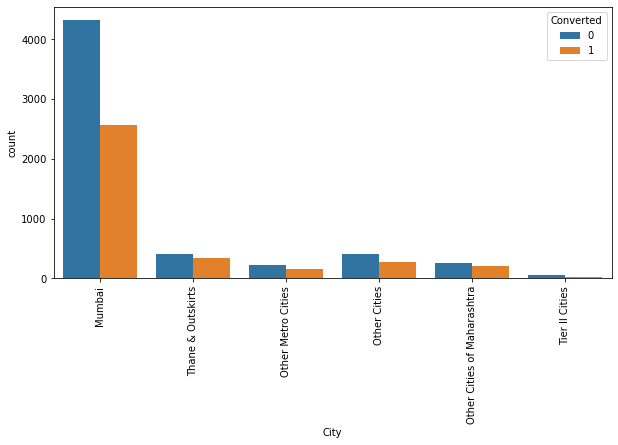

In [26]:
# Plotting spread of City columnn after replacing NaN values
plt.figure(figsize=(10,5))
s1 = sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [27]:
# Checking value counts of Specialization column
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

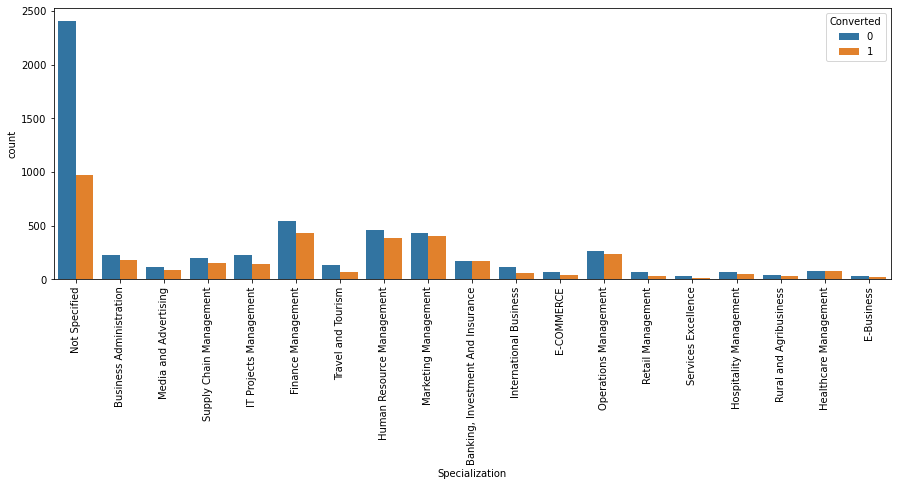

In [29]:
# Plotting spread of Specialization columnn 
plt.figure(figsize=(15,5))
s1 = sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<ul>We see that specialization with <b>Management</b>  in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.</ul>

In [30]:
# Combining Management Specializations because they show similar trends

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

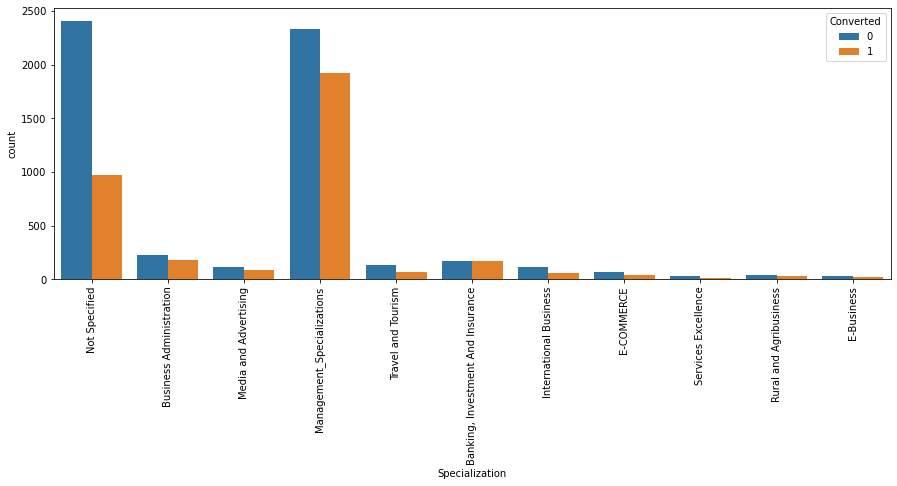

In [31]:
# Visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1 = sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [32]:
# What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
# imputing Nan values with mode "Unemployed"
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [34]:
# Checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

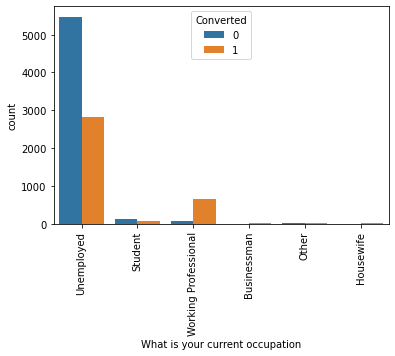

In [35]:
# Visualizing count of Variable based on Converted value

s1 = sns.countplot(df['What is your current occupation'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

<ul>
<li>Working Professionals going for the course have high chances of joining it.</li>
<li>Unemployed leads are the most in terms of Absolute numbers.</li>
</ul>

In [36]:
# Checking value counts 
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [37]:
# Replacing Nan values with Mode "Better Career Prospects"
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

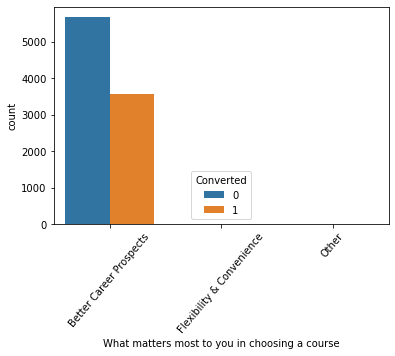

In [38]:
# Visualizing count of Variable based on Converted value
s1=sns.countplot(df['What matters most to you in choosing a course'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=50)
plt.show()

In [39]:
# Checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')

In [41]:
# Checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [42]:
# Replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

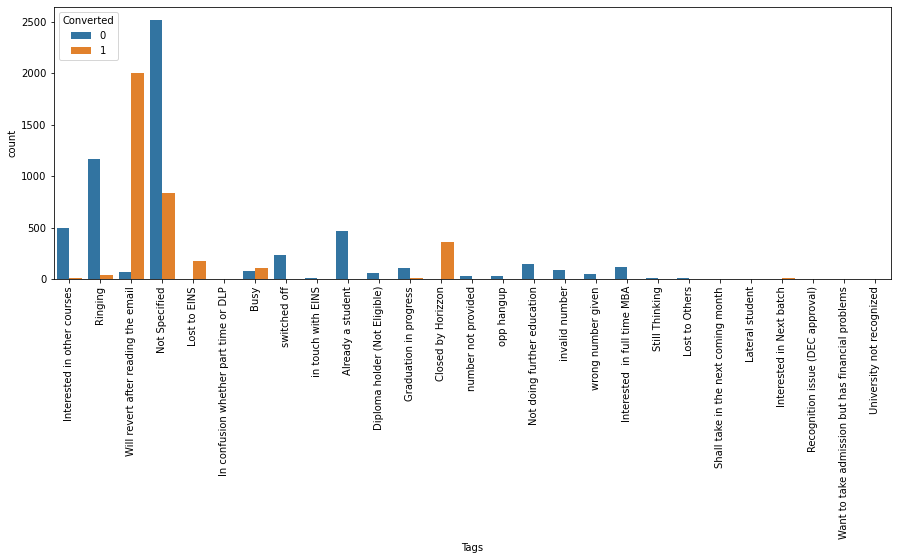

In [43]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [44]:
# Replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

df['Tags'] = df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [45]:
# Checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
# Checking value counts of Lead Source column
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
youtubechannel          1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [47]:
# Replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

<ul>We can group some of the lower frequency occuring labels under a common label 'Others'</ul>

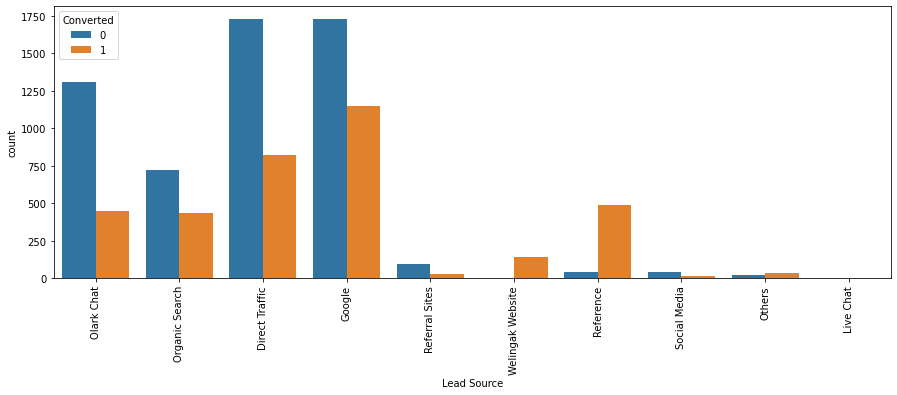

In [48]:
# Visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1 = sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference 
<ul>
<li>Maximum number of leads are generated by Google and Direct traffic.<\li>
<li>Conversion Rate of reference leads and leads through welingak website is high.<\li>
<li>To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.<\li>
<\ul>

In [49]:
# Last Activity:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
# Replacing Nan Values and combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [51]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [52]:
# Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [53]:
# Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [54]:
# Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [55]:
# Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

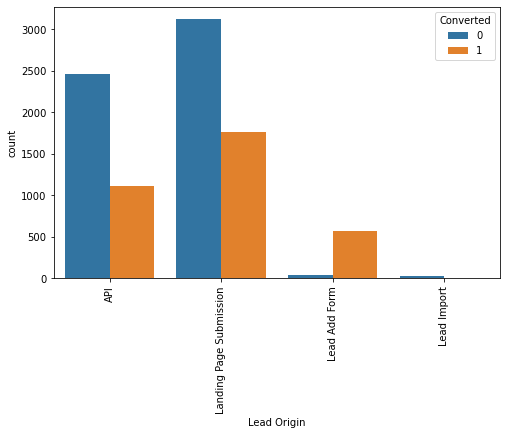

In [56]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference
<li>API and Landing Page Submission bring higher number of leads as well as conversion.</li>
<li>Lead Add Form has a very high conversion rate but count of leads are not very high.</li>
<li>Lead Import and Quick Add Form get very few leads.</li>
<li>In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.</li>

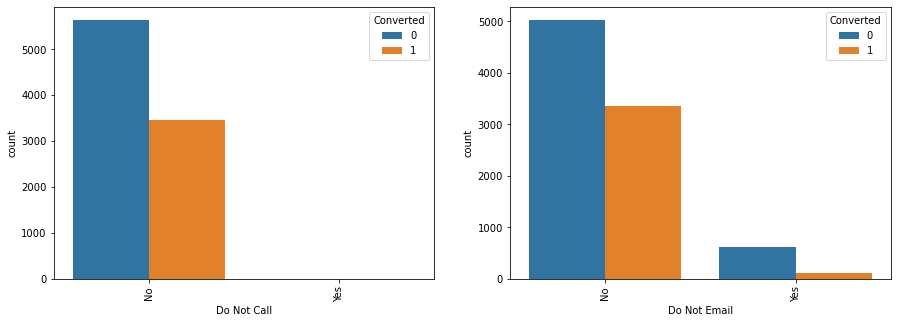

In [57]:
# Do Not Email & Do Not Call
# Visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1 = plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [58]:
# Checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [59]:
# Checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

<ul>We Can append the <b>Do Not Call</b> Column to the list of Columns to be Dropped since > 90% is of only one Value</ul>

In [60]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [61]:
# IMBALANCED VARIABLES THAT CAN BE DROPPED

In [62]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [63]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [64]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [65]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [66]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [67]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [68]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [69]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [70]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [71]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [72]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [73]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [74]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [75]:
# Checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [76]:
# Clubbing lower frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

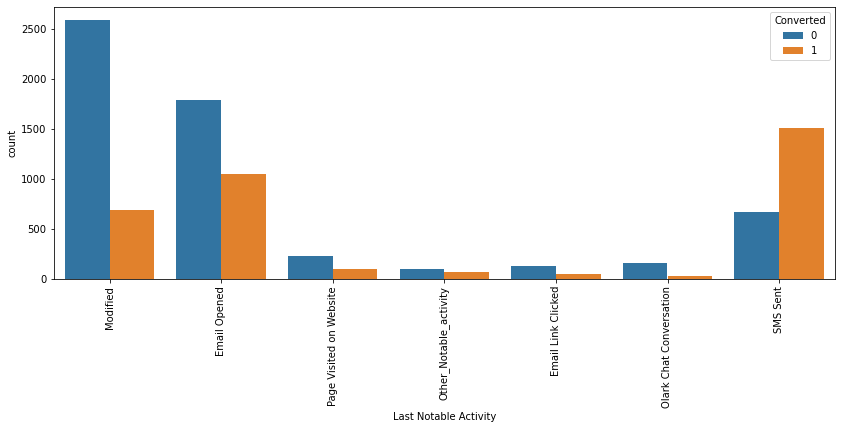

In [77]:
# Visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [78]:
# Checking value counts for variable 
df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [79]:
# List of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [80]:
#dropping columns
df = df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

### 3.3 Numerical Attributes Analysis:

In [81]:
# Check the % of Data that has Converted Values = 1:
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

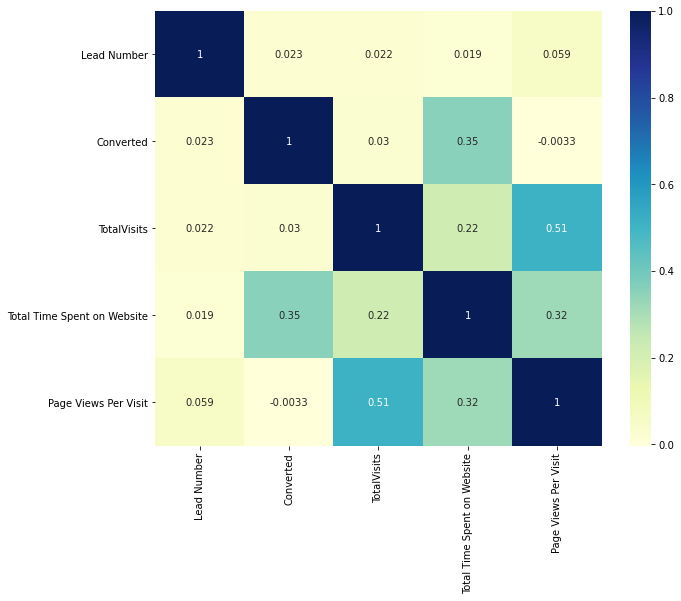

In [82]:
# Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

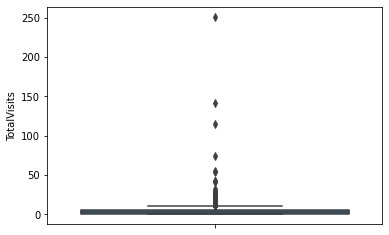

In [83]:
# Total Visits
# visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

<ul> We can observe the presence of an outliers</ul>

In [84]:
# Checking percentile values for "Total Visits" 
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

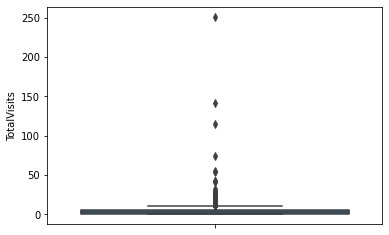

In [85]:
# Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = df.TotalVisits.quantile(0.99)
leads = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
leads = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

#### Check for the Next Numerical Column:

In [86]:
# Checking percentiles for "Total Time Spent on Website"
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
95%      1556.900000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

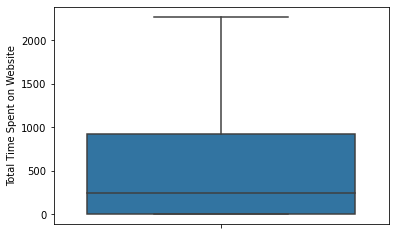

In [87]:
# visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

<ul>Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column</ul>

<ul>Check for Page Views Per Visit:<\ul>

In [88]:
# Checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

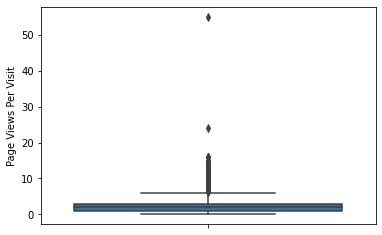

In [89]:
# Visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

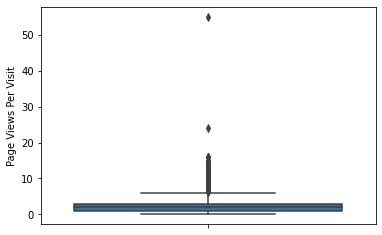

In [90]:
# Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
leads = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
leads = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

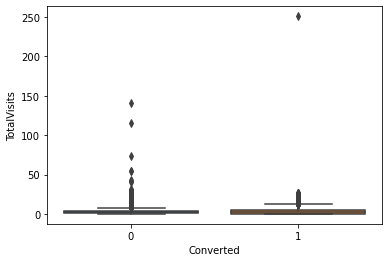

In [91]:
# Checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()


##### Inference
<li>Median for converted and not converted leads are the close.</li>
<li>Nothng conclusive can be said on the basis of Total Visits.</li>

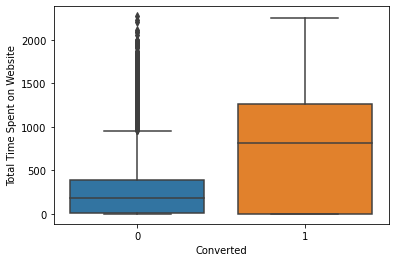

In [92]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

##### Inference
<li>Leads spending more time on the website are more likely to be converted.</li>
<li>Website should be made more engaging to make leads spend more time.</li>

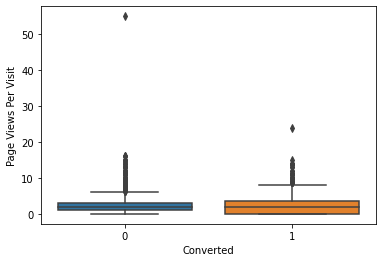

In [93]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=leads['Page Views Per Visit'])
plt.show()

##### Inference
<li>Median for converted and unconverted leads is the same.</li>
<li>Nothing can be said specifically for lead conversion from Page Views Per Visit.</li>

In [94]:
# Checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

<b>There are no missing values in the columns to be analyzed further</b>

### 3.4 Dummy Variable Creation:

In [95]:
# Getting a list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [96]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [97]:
# Getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

df = pd.concat([df, dummy],1)

In [98]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [99]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [100]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [101]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [103]:
# Dropping the original columns after dummy variable creation
df.drop(cat_cols, 1, inplace = True)

In [104]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,660727,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,660719,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# 4.0 Train-Test Split & Logistic Regression Model Building

In [105]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [106]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           6372 non-null   int64  
 1   TotalVisits                                           6372 non-null   float64
 2   Total Time Spent on Website                           6372 non-null   int64  
 3   Page Views Per Visit                                  6372 non-null   float64
 4   Lead Origin_Landing Page Submission                   6372 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6372 non-null   uint8  
 6   Lead Origin_Lead Import                               6372 non-null   uint8  
 7   What is your current occupation_Housewife             6372 non-null   uint8  
 8   What is your current occupation_Other                 6

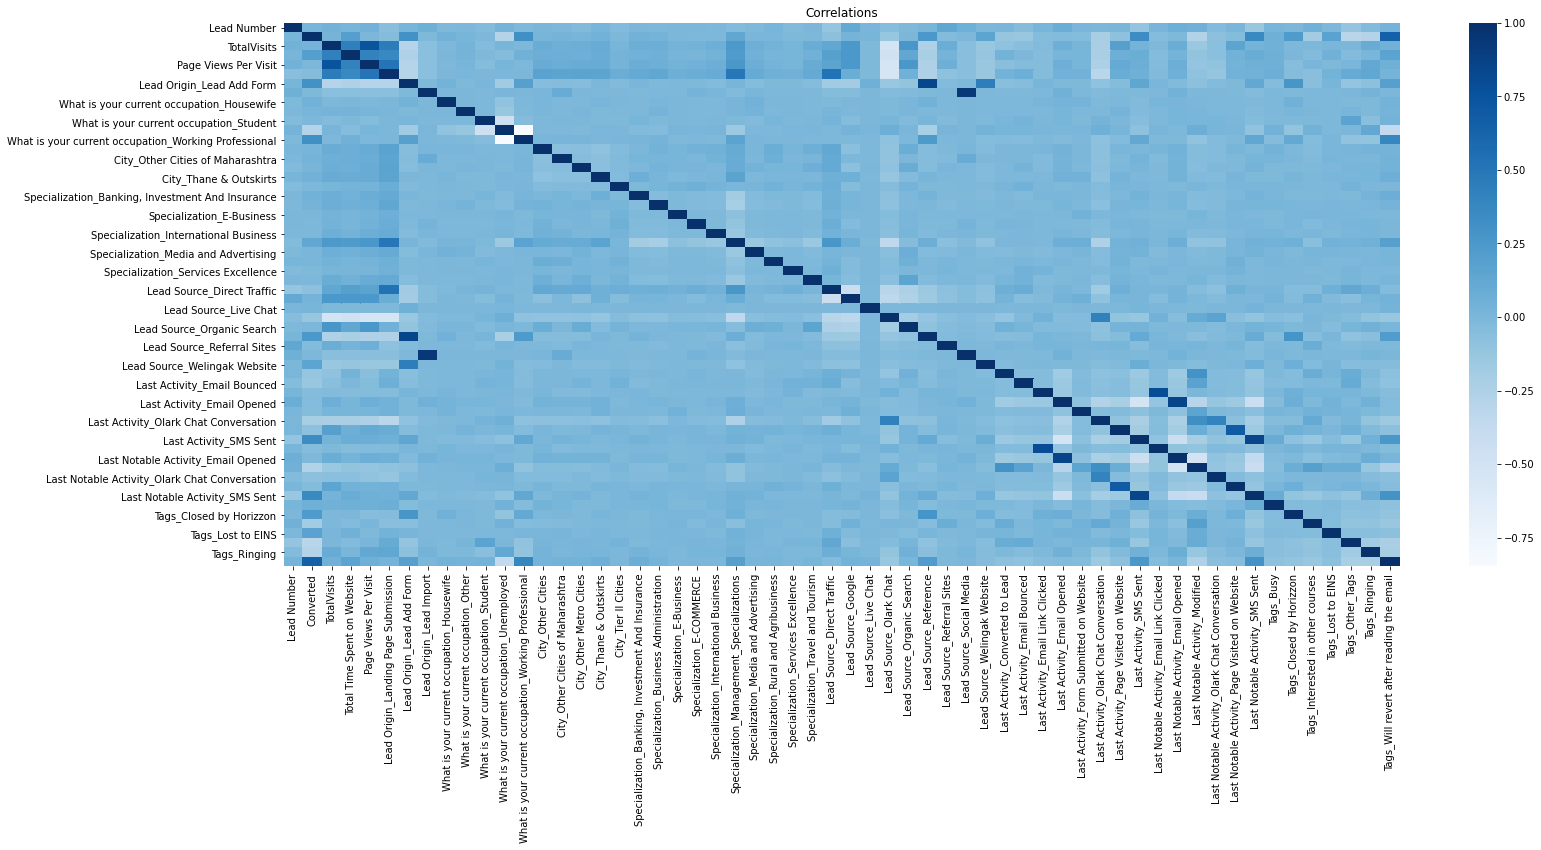

In [183]:
# setting the figure size

plt.figure(figsize=(25,10))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(df.corr(method='kendall'),cmap='Blues')

plt.show()

## 4.1 Scaling of Data

In [108]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

## 4.2 Model Building using Stats Model & RFE

In [109]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [110]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [111]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 23),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('What is your current occupation_Housewife', False, 19),
 ('What is your current occupation_Other', False, 30),
 ('What is your current occupation_Student', False, 16),
 ('What is your current occupation_Unemployed', False, 15),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 21),
 ('City_Other Cities of Maharashtra', False, 18),
 ('City_Other Metro Cities', False, 27),
 ('City_Thane & Outskirts', False, 34),
 ('City_Tier II Cities', False, 11),
 ('Specialization_Banking, Investment And Insurance', False, 20),
 ('Specialization_Business Administration', False, 35),
 ('Specialization_E-Business', False, 17),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_

In [112]:
# list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [113]:
# BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.9
Date:                Mon, 09 Aug 2021   Deviance:                       2491.7
Time:                        10:32:16   Pearson chi2:                 8.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3817      0.129     -2.960      0.003      -0.634      -0.129
Total Time Spent on Website                              1.0805      0.061     17.779      0.000       0.961       1.200
Lead Origin_Lead Add Form                                0.9220      0.433      2.131      0.033       0.074       1.770
What is your current occupation_Working Professional     0.7211      0.382      1.888      0.059      -0.028       1.470
Lead Source_Direct Traffic                              -1.4519      0.173     -8.401      0.000      -1.791      -1.113
Lead Source_Google                                      -1.0831      0.158     -6.838      0.000      -1.394      -0.773
Lead Source_Organic Search                              -1.0887      0.197     -5.537      0.000      -1.474      -0.703
Lead Source_Referral Sites                              -1.3109      0.517     -2.536      0.011      -2.324      -0.298
Lead Source_Welingak Website                             3.3974      0.843      4.033      0.000       1.746       5.049
Last Activity_Email Bounced                             -0.9480      0.443     -2.138      0.033      -1.817      -0.079
Last Activity_SMS Sent                                   1.4485      0.231      6.265      0.000       0.995       1.902
Last Notable Activity_Email Link Clicked                -1.0647      0.425     -2.506      0.012      -1.897      -0.232
Last Notable Activity_Modified                          -1.5110      0.157     -9.616      0.000      -1.819      -1.203
Last Notable Activity_Olark Chat Conversation           -1.6871      0.404     -4.173      0.000      -2.480      -0.895
Last Notable Activity_SMS Sent                           0.5396      0.263      2.053      0.040       0.024       1.055
Tags_Closed by Horizzon                                  6.4019      0.735      8.707      0.000       4.961       7.843
Tags_Interested in other courses                        -2.0290      0.374     -5.430      0.000      -2.761      -1.297
Tags_Lost to EINS                                        6.2747      0.732      8.575      0.000       4.840       7.709
Tags_Other_Tags                                         -2.4319      0.215    -11.313      0.000      -2.853      -2.011
Tags_Ringing                                            -3.5411      0.250    -14.140      0.000      -4.032      -3.050
Tags_Will revert after reading the email                 4.3913      0.200     22.003      0.000       4.000       4.782
========================================================================================================================
"""

<ul>p-value of variable <b>What is your current occupation_Working Professional</b> is <b>0.059</b> is high, so we can drop it.</ul>

In [114]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Working Professional',1)

In [115]:
# BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1247.8
Date:                Mon, 09 Aug 2021   Deviance:                       2495.5
Time:                        12:47:28   Pearson chi2:                 8.61e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3793      0.129     -2.942      0.003      -0.632      -0.127
Total Time Spent on Website                       1.0809      0.061     17.785      0.000       0.962       1.200
Lead Origin_Lead Add Form                         0.9440      0.433      2.181      0.029       0.096       1.792
Lead Source_Direct Traffic                       -1.4454      0.173     -8.366      0.000      -1.784      -1.107
Lead Source_Google                               -1.0843      0.158     -6.847      0.000      -1.395      -0.774
Lead Source_Organic Search                       -1.0948      0.197     -5.564      0.000      -1.480      -0.709
Lead Source_Referral Sites                       -1.3132      0.515     -2.549      0.011      -2.323      -0.303
Lead Source_Welingak Website                      3.3720      0.843      4.002      0.000       1.721       5.023
Last Activity_Email Bounced                      -0.9398      0.444     -2.115      0.034      -1.811      -0.069
Last Activity_SMS Sent                            1.4495      0.231      6.269      0.000       0.996       1.903
Last Notable Activity_Email Link Clicked         -1.0604      0.423     -2.509      0.012      -1.889      -0.232
Last Notable Activity_Modified                   -1.5093      0.157     -9.621      0.000      -1.817      -1.202
Last Notable Activity_Olark Chat Conversation    -1.6994      0.406     -4.190      0.000      -2.494      -0.905
Last Notable Activity_SMS Sent                    0.5384      0.263      2.048      0.041       0.023       1.054
Tags_Closed by Horizzon                           6.4846      0.734      8.839      0.000       5.047       7.922
Tags_Interested in other courses                 -1.9979      0.374     -5.345      0.000      -2.730      -1.265
Tags_Lost to EINS                                 6.2973      0.731      8.616      0.000       4.865       7.730
Tags_Other_Tags                                  -2.4220      0.215    -11.271      0.000      -2.843      -2.001
Tags_Ringing                                     -3.5450      0.250    -14.153      0.000      -4.036      -3.054
Tags_Will revert after reading the email          4.5231      0.192     23.574      0.000       4.147       4.899
=================================================================================================================
"""

<ul>Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables</ul>

In [116]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.39
8,Last Activity_SMS Sent,6.31
18,Tags_Will revert after reading the email,2.03
10,Last Notable Activity_Modified,1.99
1,Lead Origin_Lead Add Form,1.92
4,Lead Source_Google,1.85
3,Lead Source_Direct Traffic,1.84
16,Tags_Other_Tags,1.43
17,Tags_Ringing,1.38
5,Lead Source_Organic Search,1.37


<ul>VIF of variable <b>Last Notable Activity_SMS Sent</b> is <b>6.39</b> is high, so we can drop it.</ul>

In [118]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_SMS Sent',1)

In [119]:
# BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.9
Date:                Mon, 09 Aug 2021   Deviance:                       2499.8
Time:                        12:49:30   Pearson chi2:                 8.50e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.3207      0.125     -2.564      0.010      -0.566      -0.076
Total Time Spent on Website                       1.0790      0.061     17.808      0.000       0.960       1.198
Lead Origin_Lead Add Form                         0.9089      0.433      2.098      0.036       0.060       1.758
Lead Source_Direct Traffic                       -1.4686      0.172     -8.548      0.000      -1.805      -1.132
Lead Source_Google                               -1.1067      0.157     -7.031      0.000      -1.415      -0.798
Lead Source_Organic Search                       -1.1080      0.196     -5.660      0.000      -1.492      -0.724
Lead Source_Referral Sites                       -1.3354      0.514     -2.597      0.009      -2.343      -0.328
Lead Source_Welingak Website                      3.3559      0.844      3.976      0.000       1.702       5.010
Last Activity_Email Bounced                      -0.8784      0.444     -1.976      0.048      -1.750      -0.007
Last Activity_SMS Sent                            1.8587      0.116     16.032      0.000       1.631       2.086
Last Notable Activity_Email Link Clicked         -1.1242      0.424     -2.652      0.008      -1.955      -0.293
Last Notable Activity_Modified                   -1.7069      0.128    -13.364      0.000      -1.957      -1.457
Last Notable Activity_Olark Chat Conversation    -1.7590      0.405     -4.338      0.000      -2.554      -0.964
Tags_Closed by Horizzon                           6.5919      0.734      8.983      0.000       5.154       8.030
Tags_Interested in other courses                 -1.9853      0.375     -5.298      0.000      -2.720      -1.251
Tags_Lost to EINS                                 6.3929      0.731      8.743      0.000       4.960       7.826
Tags_Other_Tags                                  -2.3975      0.214    -11.225      0.000      -2.816      -1.979
Tags_Ringing                                     -3.4827      0.247    -14.098      0.000      -3.967      -2.999
Tags_Will revert after reading the email          4.5773      0.193     23.754      0.000       4.200       4.955
=================================================================================================================
"""

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.91
3,Lead Source_Google,1.87
2,Lead Source_Direct Traffic,1.85
17,Tags_Will revert after reading the email,1.78
10,Last Notable Activity_Modified,1.65
8,Last Activity_SMS Sent,1.61
15,Tags_Other_Tags,1.42
16,Tags_Ringing,1.38
4,Lead Source_Organic Search,1.37
6,Lead Source_Welingak Website,1.36


<ul>So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data</ul>

In [121]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.407754
5520    0.067780
1962    0.013527
1566    0.990565
9170    0.024871
5097    0.219027
8954    0.026634
309     0.938166
5519    0.642756
1050    0.987298
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.40775413, 0.06777996, 0.01352717, 0.9905652 , 0.02487066,
       0.21902727, 0.02663373, 0.93816642, 0.64275613, 0.98729821])

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.407754,7962
1,0,0.067780,5520
2,0,0.013527,1962
3,1,0.990565,1566
4,0,0.024871,9170


In [124]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.407754,7962,0
1,0,0.067780,5520,0
2,0,0.013527,1962,0
3,1,0.990565,1566,1
4,0,0.024871,9170,0


In [125]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3781  172]
 [ 296 2123]]


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9265536723163842


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8776353865233567

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9564887427270428

In [130]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.043511257272957245


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.9250544662309368


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9273975962717684


# 5.0 PLOTTING ROC CURVE

In [189]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

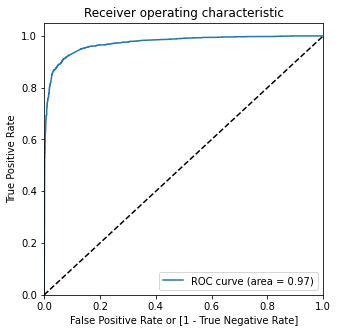

In [191]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

<ul>The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model</ul>

## 5.1 Finding Optimal Cutoff Point

<ul>Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that</ul>

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.407754,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.067780,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.013527,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.990565,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024871,9170,0,1,0,0,0,0,0,0,0,0,0


In [200]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','Accuracy','Sensitivity','Specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]
print(cutoff_df)

     prob  Accuracy  Sensitivity  Specificity
0.0   0.0  0.379630     1.000000     0.000000
0.1   0.1  0.835844     0.970236     0.753605
0.2   0.2  0.898462     0.949979     0.866937
0.3   0.3  0.921846     0.912360     0.927650
0.4   0.4  0.923572     0.895825     0.940551
0.5   0.5  0.926554     0.877635     0.956489
0.6   0.6  0.927338     0.857792     0.969896
0.7   0.7  0.914313     0.807358     0.979762
0.8   0.8  0.904583     0.775114     0.983810
0.9   0.9  0.888104     0.720546     0.990640


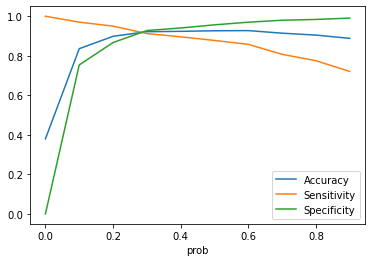

In [201]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [139]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.407754,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.067780,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.013527,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.990565,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024871,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.407754,7962,1,41
1,0,0.067780,5520,0,7
2,0,0.013527,1962,0,1
3,1,0.990565,1566,1,99
4,0,0.024871,9170,0,2


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9218455743879472

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3667,  286],
       [ 212, 2207]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9123604795369987

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.9276498861624083

#### Observation:
<ul>
    <p>So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data</p>
<li>Accuracy : 92.18%</li>
<li>Sensitivity : 91.23%</li>
<li>Specificity : 92.76%</li>
</ul>
<ul>
    Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.
 </ul>

In [146]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0723501138375917


In [147]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8852787805856398


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9453467388502191


In [149]:
# Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3667,  286],
       [ 212, 2207]], dtype=int64)

In [150]:
# Precision
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8852787805856398

In [151]:
# Recall
# TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9123604795369987

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

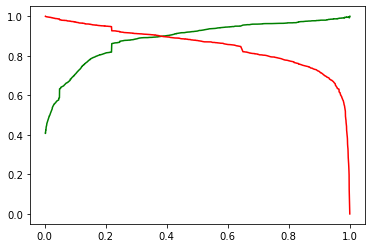

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Scaling of Test Data

In [155]:
#scaling test set

num_cols = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,0.422362,-0.092900,-0.103815,0.289261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4050,0.175528,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7201,-0.988748,-0.289891,0.424120,-0.166294,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1196,1.298896,0.104091,-0.105648,0.744816,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8219,-1.290830,0.695064,-0.428274,-0.280183,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [156]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.103815,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4050,-0.881052,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
7201,0.424120,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1196,-0.105648,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8219,-0.428274,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [157]:
X_test_sm = sm.add_constant(X_test)

# 6.0 PREDICTIONS ON TEST SET

In [158]:
y_test_pred = res.predict(X_test_sm)

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [161]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [162]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [163]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [164]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.006539
1,1,4050,0.997702
2,0,7201,0.133477
3,0,1196,0.006526
4,1,8219,0.984350


In [165]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [166]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.006539
1,1,4050,0.997702
2,0,7201,0.133477
3,0,1196,0.006526
4,1,8219,0.984350


In [167]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [168]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.006539,1
1,4050,1,0.997702,100
2,7201,0,0.133477,13
3,1196,0,0.006526,1
4,8219,1,0.984350,98


In [169]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [170]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.006539,1,0
1,4050,1,0.997702,100,1
2,7201,0,0.133477,13,0
3,1196,0,0.006526,1,0
4,8219,1,0.984350,98,1


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9267667521054559

In [172]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1571,  118],
       [  82,  960]], dtype=int64)

In [173]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [174]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9213051823416507

In [175]:
# Let us calculate specificity
TN / float(TN+FP)

0.9301361752516282

In [177]:
from sklearn.metrics import precision_score, recall_score  
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8905380333951762

In [178]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9213051823416507

#### Observation:
<ul>After running the model on the Test Data these are the figures we obtain:</ul>

<li>Accuracy : 92.67%</li>
<li>Sensitivity : 92.13%</li>
<li>Specificity : 93.01%</li>

#### Variable Importance:

In [203]:
importance_df = (np.std(X_test_sm[res.params.index].values, 0) * res.params)
importance_df.sort_values(ascending=False)

Tags_Will revert after reading the email         1.934671
Tags_Closed by Horizzon                          1.111573
Total Time Spent on Website                      1.075778
Last Activity_SMS Sent                           0.853442
Tags_Lost to EINS                                0.813836
Lead Source_Welingak Website                     0.355510
Lead Origin_Lead Add Form                        0.223178
const                                           -0.000000
Last Activity_Email Bounced                     -0.154258
Last Notable Activity_Email Link Clicked        -0.155078
Lead Source_Referral Sites                      -0.160429
Last Notable Activity_Olark Chat Conversation   -0.231143
Lead Source_Organic Search                      -0.369470
Tags_Interested in other courses                -0.416476
Lead Source_Google                              -0.509690
Lead Source_Direct Traffic                      -0.665412
Last Notable Activity_Modified                  -0.820884
Tags_Other_Tag

In [202]:
# To re-assure our selfs lets also try permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance


lm = LogisticRegression(max_iter=1000)
lm.fit(X_test_sm[res.params.index], y_test)

r = permutation_importance(lm, X_test_sm[res.params.index], y_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{res.params.index[i]:<8} "
               f"{r.importances_mean[i]:.3f} "
               f" +/- {r.importances_std[i]:.3f}")

Tags_Will revert after reading the email 0.146  +/- 0.005
Total Time Spent on Website 0.037  +/- 0.004
Tags_Ringing 0.037  +/- 0.003
Last Activity_SMS Sent 0.034  +/- 0.003
Tags_Closed by Horizzon 0.031  +/- 0.002
Tags_Other_Tags 0.024  +/- 0.002
Last Notable Activity_Modified 0.017  +/- 0.003
Tags_Lost to EINS 0.015  +/- 0.001
Lead Source_Direct Traffic 0.011  +/- 0.003
Lead Source_Google 0.006  +/- 0.002
Tags_Interested in other courses 0.002  +/- 0.001
Last Notable Activity_Email Link Clicked 0.001  +/- 0.000


## Observations:
  - Tags  and Total Time Spent on Website are among the top indicators for convertible  leads.
  - Tags and Last Notable Activity are among the top indicators for un-convertible leads.

## Final Observation:
<ul>
<p>Let us compare the values obtained for Train & Test:</p><br>
<b><u>Train Data:</u></b>
<li>Accuracy : 92.18%</li>
<li>Sensitivity : 91.23%</li>
<li>Specificity : 92.76%</li>
    <br>
<b><u>Test Data:</u></b>
<li>Accuracy : 92.67%</li>
<li>Sensitivity : 92.13%</li>
<li>Specificity : 93.01%</li>